# Visualisations des données synthèse

## Import des bibliothèques

In [2]:
import pandas as pd
import re
from plotly.offline import iplot
import plotly.graph_objs as go
from plotly import subplots
import numpy as np
import plotly.express as px

## Lecture du fichier csv

In [3]:
dfsynthese = pd.read_csv("data/Synthèse nettoyé.csv")
dfsynthese

,Code\nAGB,Code\nCIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,code saison (0 : hors saison ; 1 : de saison ; 2 : mix de consommation FR),code avion (1 : par avion),Livraison,Matériau d'emballage,...,Effets toxicologiques sur la santé humaine : substances cancérogènes,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux
0,11084,11084,aides culinaires et ingrédients divers,algues,"Agar (algue), cru","Seaweed, agar, raw",2,0,Ambiant (long),LDPE,...,6.482667e-09,0.099733,0.001868,0.013280,0.127350,44.555153,26.476190,3.102487,315.057170,0.000088
1,11023,11023,aides culinaires et ingrédients divers,herbes,"Ail séché, poudre","Garlic, powder, dried",2,0,Ambiant (long),Verre,...,4.662163e-10,0.006222,0.000124,0.002320,0.012695,5.832120,20.223652,2.520528,12.665447,0.000007
2,11000,11000,aides culinaires et ingrédients divers,herbes,"Ail, cru","Garlic, fresh",2,0,Ambiant (long),Pas d'emballage,...,2.984758e-10,0.002005,0.000068,0.002123,0.006281,4.092332,18.454615,3.021753,6.230187,0.000004
3,11093,11093,aides culinaires et ingrédients divers,herbes,"Aneth, frais","Dill, fresh",2,0,Ambiant (long),LDPE,...,6.189716e-10,0.008112,0.000203,0.004050,0.031181,5.681342,36.373722,5.292121,12.553109,0.000005
4,20995,20995,aides culinaires et ingrédients divers,algues,"Ao-nori (Enteromorpha sp.), séchée ou déshydratée","Sea lettuce (Enteromorpha sp.), dried or dehyd...",2,0,Ambiant (long),LDPE,...,6.482667e-09,0.099733,0.001868,0.013280,0.127350,44.555153,26.476190,3.102487,315.057170,0.000088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,6535,6535,"viandes, œufs, poissons",viandes crues,"Veau, steak haché 20% MG, cru","Veal, minced steak, 20% fat, raw",2,0,Glacé,PS,...,1.083839e-08,0.224717,0.002212,0.155523,0.960260,192.779240,1521.149300,6.276344,111.478480,0.000038
2513,6582,6582,"viandes, œufs, poissons",viandes cuites,"Veau, tête, bouillie/cuite à l'eau","Calf, head, boiled/cooked in water",2,0,Glacé,PS,...,1.123270e-08,0.232137,0.002296,0.160360,0.990430,200.367930,1566.700800,6.517015,115.625970,0.000041
2514,26146,26146,"viandes, œufs, poissons",poissons crus,"Vivaneau, cru","Snapper, raw",2,0,Glacé,PS,...,4.015680e-09,0.095432,0.000677,0.022499,0.244290,24.102134,14.699972,0.559311,60.601249,0.000163
2515,26147,26147,"viandes, œufs, poissons",poissons cuits,"Vivaneau, cuit","Snapper, cooked",2,0,Glacé,PP,...,5.002364e-09,0.116709,0.000867,0.027545,0.298742,29.317396,18.678957,0.642664,86.252396,0.000203


In [4]:
dfdetail = pd.read_csv("data/detail etape.csv")
dfdetail

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,Agriculture,Transformation,Emballage,Transport,Supermarché et distribution,Consommation,Total
0,11084,11084,aides culinaires et ingrédients divers,algues,"Agar (algue), cru","Seaweed, agar, raw",4.569259,1.492415,0.290252,0.384404,0.020135,0.009943,6.766407
1,11023,11023,aides culinaires et ingrédients divers,herbes,"Ail séché, poudre","Garlic, powder, dried",0.066043,0.000000,0.478390,0.189268,0.015709,0.000000,0.749409
2,11000,11000,aides culinaires et ingrédients divers,herbes,"Ail, cru","Garlic, fresh",0.082554,0.000000,0.000000,0.173563,0.019636,0.080370,0.356122
3,11093,11093,aides culinaires et ingrédients divers,herbes,"Aneth, frais","Dill, fresh",0.222514,0.000000,0.329456,0.162968,0.019636,0.080370,0.814944
4,20995,20995,aides culinaires et ingrédients divers,algues,"Ao-nori (Enteromorpha sp.), séchée ou déshydratée","Sea lettuce (Enteromorpha sp.), dried or dehyd...",4.569259,1.492415,0.290252,0.384404,0.020135,0.009943,6.766407
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,6535,6535,"viandes, œufs, poissons",viandes crues,"Veau, steak haché 20% MG, cru","Veal, minced steak, 20% fat, raw",21.683172,0.241985,0.275642,0.205100,0.036974,0.006688,22.449561
2513,6582,6582,"viandes, œufs, poissons",viandes cuites,"Veau, tête, bouillie/cuite à l'eau","Calf, head, boiled/cooked in water",22.327031,0.074157,0.435259,0.315136,0.058385,0.344055,23.554023
2514,26146,26146,"viandes, œufs, poissons",poissons crus,"Vivaneau, cru","Snapper, raw",3.143568,0.000000,0.275642,0.787359,0.036974,0.006688,4.250231
2515,26147,26147,"viandes, œufs, poissons",poissons cuits,"Vivaneau, cuit","Snapper, cooked",3.838479,0.000000,0.225346,0.961411,0.045148,0.094235,5.164618


### Comparez l'impact moyen sur le changement climatique en fonction de l'étape de production pour chaque catégorie d'aliment

In [5]:
etape_production_groupe = dfdetail.groupby("Groupe d'aliment")[["Agriculture", "Transformation", "Emballage", "Transport", "Supermarché et distribution", "Consommation", "Total"]].mean()
etape_production_groupe

,Agriculture,Transformation,Emballage,Transport,Supermarché et distribution,Consommation,Total
Groupe d'aliment,,,,,,,
aides culinaires et ingrédients divers,2.031066,0.538959,0.299062,0.235792,0.025990,0.011558,3.142427
aliments infantiles,1.620546,0.413626,0.180929,0.161804,0.019906,0.006430,2.403242
boissons,0.605000,0.517809,0.208404,0.170390,0.020806,0.004367,1.526776
entrées et plats composés,3.659338,0.354920,0.193881,0.284142,0.031671,0.040799,4.564751
"fruits, légumes, légumineuses et oléagineux",0.657662,0.114214,0.180453,0.318938,0.034118,0.080976,1.386362
glaces et sorbets,0.995903,0.298704,0.183951,0.206351,0.064524,0.025304,1.774739
lait et produits laitiers,3.431258,0.412786,0.220547,0.210364,0.033761,0.006088,4.314804
matières grasses,2.830651,0.624718,0.188152,0.285022,0.029667,0.004060,3.962271
produits céréaliers,1.513876,0.591245,0.195568,0.165044,0.017868,0.009669,2.493270


#### Visualisation

In [6]:
indicateurs = etape_production_groupe.columns[0:6]

separation_graphique = subplots.make_subplots(rows=2, cols=3, subplot_titles=indicateurs)

plot = 0

for indi in indicateurs:
    ligne = np.unravel_index(plot, (2, 3))[0] + 1
    colonne = np.unravel_index(plot, (2, 3))[1] + 1
    indi = go.Bar(y=etape_production_groupe.index, x=etape_production_groupe[indi], name=indi, orientation="h")
    separation_graphique.append_trace(indi, ligne, colonne)
    plot += 1

separation_graphique.update_layout(
    height=550, width=1200,
    title_text="Impact sur le changement climatique des aliments selon le groupe d'aliment et l'étape de production",
    showlegend=False,
    font=dict(size=9)
)

# Ajuster la position horizontale des sous-graphiques
separation_graphique.update_xaxes(domain=[0, 0.20], row=1, col=1)
separation_graphique.update_xaxes(domain=[0.40, 0.60], row=1, col=2)
separation_graphique.update_xaxes(domain=[0.80, 1], row=1, col=3)
separation_graphique.update_xaxes(domain=[0, 0.20], row=2, col=1)
separation_graphique.update_xaxes(domain=[0.40, 0.60], row=2, col=2)
separation_graphique.update_xaxes(domain=[0.80, 1], row=2, col=3)

iplot(separation_graphique)

### Ecart-type moyen au sein des groupes d'aliments

In [7]:
variabilité = dfdetail.groupby("Groupe d'aliment")[["Agriculture", "Transformation", "Emballage", "Transport", "Supermarché et distribution", "Consommation", "Total"]].std()

#### Visualisation

In [8]:
fig = px.box(dfdetail, y="Groupe d'aliment", x="Total", title="Variabilité des impacts totaux sur le changement climatique des groupes d'aliments")
fig.update_layout(xaxis_title=None, yaxis_title=None)
fig.show()

In [22]:
import plotly.subplots as subplots
import plotly.graph_objects as go
from plotly.offline import iplot
import numpy as np
from scipy.stats.mstats import winsorize

indicateurs = etape_production_groupe.columns[0:6]
separation_graphique = subplots.make_subplots(rows=6, cols=1, subplot_titles=indicateurs)

for i, indi in enumerate(indicateurs, 1):
    # Appliquer la winsorisation pour remplacer les valeurs aberrantes
    lower_limit = dfdetail[indi].quantile(0.005)
    upper_limit = dfdetail[indi].quantile(0.995)

    # Filtrer les données en enlevant les valeurs extrêmes
    data = dfdetail[(dfdetail[indi] > lower_limit) & (dfdetail[indi] < upper_limit)]
    
    fig = go.Box(y=data["Groupe d'aliment"], x=data[indi], name=indi, orientation='h')
    separation_graphique.add_trace(fig, row=i, col=1)
    
    
    # Ajuster l'échelle de l'axe y
    separation_graphique.update_xaxes(range=[min(data[indi])-min(data[indi])*0.2, max(data[indi])+max(data[indi])*0.2], row=i, col=1)

separation_graphique.update_layout(
    height=2300, width=1000,
    title_text="Variabilité des impacts selon le groupe d'aliments et l'étape de production",
    showlegend=False,
    font=dict(size=9)
)

iplot(separation_graphique)


### Zoom sur la catégorie viande, oeufs, poisson

In [ ]:
dfcategorie = dfdetail[dfdetail["Groupe d'aliment"]=="viandes, œufs, poissons"]

In [ ]:
sous_groupe = dfcategorie.groupby("Sous-groupe d'aliment")[["Agriculture", "Transformation", "Emballage", "Transport", "Supermarché et distribution", "Consommation", "Total"]].mean()
sous_groupe

,Agriculture,Transformation,Emballage,Transport,Supermarché et distribution,Consommation,Total
Sous-groupe d'aliment,,,,,,,
autres produits à base de viande,13.410348,0.618804,0.367419,0.252284,0.040035,0.081207,14.770097
charcuteries,7.979284,0.705757,0.348060,0.216974,0.036181,0.048119,9.334374
mollusques et crustacés crus,5.240872,0.515398,0.834828,2.012283,0.097364,0.516238,9.216983
mollusques et crustacés cuits,9.115566,2.013600,0.424037,2.939638,0.099687,0.847110,15.439637
poissons crus,6.323861,0.015013,0.276016,1.009893,0.037993,0.008213,7.670988
poissons cuits,7.457509,0.013503,0.223108,1.183527,0.043237,0.079903,9.000786
produits à base de poissons et produits de la mer,3.966566,0.403394,1.282060,0.750448,0.032097,0.045616,6.480181
substituts de charcuterie,0.358867,0.563007,0.205520,0.210652,0.039201,0.059074,1.436322
substituts de viande,0.249814,0.564942,0.141232,0.168553,0.024434,0.052544,1.201519


#### Visualisation

In [ ]:
indicateurs = sous_groupe.columns[0:6]

separation_graphique = subplots.make_subplots(rows=2, cols=3, subplot_titles=indicateurs)

plot = 0

for indi in indicateurs:
    ligne = np.unravel_index(plot, (2, 3))[0] + 1
    colonne = np.unravel_index(plot, (2, 3))[1] + 1
    indi = go.Bar(y=sous_groupe.index, x=sous_groupe[indi], name=indi, orientation="h")
    separation_graphique.append_trace(indi, ligne, colonne)
    plot += 1

separation_graphique.update_layout(
    height=550, width=1200,
    title_text="Impact sur le changement climatique des aliments viandes, oeufs et poisson selon le sous groupe d'aliment et l'étape de production",
    showlegend=False,
    font=dict(size=9)
)

# Ajuster la position horizontale des sous-graphiques
separation_graphique.update_xaxes(domain=[0, 0.20], row=1, col=1)
separation_graphique.update_xaxes(domain=[0.40, 0.60], row=1, col=2)
separation_graphique.update_xaxes(domain=[0.80, 1], row=1, col=3)
separation_graphique.update_xaxes(domain=[0, 0.20], row=2, col=1)
separation_graphique.update_xaxes(domain=[0.40, 0.60], row=2, col=2)
separation_graphique.update_xaxes(domain=[0.80, 1], row=2, col=3)

iplot(separation_graphique)


 ### Zoom sur la viande crue

In [ ]:
dfsous_categorie = dfdetail[dfdetail["Sous-groupe d\'aliment"]=="viandes crues"]

In [ ]:
dfsous_categorie.groupby("Nom du Produit en Français")[["Agriculture", "Transformation", "Emballage", "Transport", "Supermarché et distribution", "Consommation", "Total"]].mean()

,Agriculture,Transformation,Emballage,Transport,Supermarché et distribution,Consommation,Total
Nom du Produit en Français,,,,,,,
"Agneau, collier, cru",40.546904,0.066555,0.344553,0.253988,0.046218,0.088730,41.346947
"Agneau, côte filet, crue",40.546904,0.066555,0.344553,0.253988,0.046218,0.088730,41.346947
"Agneau, côte première, crue",40.546904,0.066555,0.344553,0.253988,0.046218,0.088730,41.346947
"Agneau, côtelette, crue",40.546904,0.066555,0.322472,0.253951,0.046218,0.087058,41.323157
"Agneau, gigot, cru",40.546904,0.066555,0.344553,0.253988,0.046218,0.088730,41.346947
...,...,...,...,...,...,...,...
"Veau, poitrine, crue",14.139345,0.046963,0.275642,0.199570,0.036974,0.006688,14.705182
"Veau, rôti, cru",22.092726,0.135427,0.344553,0.252702,0.046218,0.088730,22.960355
"Veau, steak haché 15% MG, cru",21.683172,0.241985,0.275642,0.205100,0.036974,0.006688,22.449561


### Regrouper par espèce animale

#### Création d'une colonne espèce animale

In [ ]:
liste_espece = ["veau", "agneau", "Bœuf", "canard", "porc", "chevreau", "chapon", "dinde", "poulet", "oie", "mouton", "lapin", "dinde", "génisse"]

In [ ]:

# Création de la colonne contenant l'espèce animale du produit
pattern = r'\b(' + '|'.join(liste_espece) + r')\b'
dfsous_categorie["Espece"]= dfsous_categorie["Nom du Produit en Français"].str.extract(pattern, flags=re.IGNORECASE)
dfsous_categorie["Espece"] = dfsous_categorie["Espece"].str.lower()

dfsous_categorie


C:\Users\cefim\AppData\Local\Temp\ipykernel_31776\3791976665.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\cefim\AppData\Local\Temp\ipykernel_31776\3791976665.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,Agriculture,Transformation,Emballage,Transport,Supermarché et distribution,Consommation,Total,Espece
1874,21514,21514,"viandes, œufs, poissons",viandes crues,"Agneau, collier, cru","Lamb, neck, raw",40.546904,0.066555,0.344553,0.253988,0.046218,0.088730,41.346947,agneau
1875,21516,21516,"viandes, œufs, poissons",viandes crues,"Agneau, côte filet, crue","Lamb, chop fillet, raw",40.546904,0.066555,0.344553,0.253988,0.046218,0.088730,41.346947,agneau
1877,21517,21517,"viandes, œufs, poissons",viandes crues,"Agneau, côte première, crue","Lamb, rib chop, raw",40.546904,0.066555,0.344553,0.253988,0.046218,0.088730,41.346947,agneau
1879,21500,21500,"viandes, œufs, poissons",viandes crues,"Agneau, côtelette, crue","Lamb, cutlet, raw",40.546904,0.066555,0.322472,0.253951,0.046218,0.087058,41.323157,agneau
1881,21504,21504,"viandes, œufs, poissons",viandes crues,"Agneau, épaule, crue","Lamb, shoulder, raw",32.437523,0.053244,0.275642,0.203190,0.036974,0.006688,33.013261,agneau
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,6580,6580,"viandes, œufs, poissons",viandes crues,"Veau, pied, cru","Calf, foot, raw",17.674181,0.058703,0.344553,0.249463,0.046218,0.088730,18.461848,veau
2508,6540,6540,"viandes, œufs, poissons",viandes crues,"Veau, poitrine, crue","Veal, breast, raw",14.139345,0.046963,0.275642,0.199570,0.036974,0.006688,14.705182,veau
2509,6550,6550,"viandes, œufs, poissons",viandes crues,"Veau, rôti, cru","Veal, roast, raw",22.092726,0.135427,0.344553,0.252702,0.046218,0.088730,22.960355,veau
2511,6536,6536,"viandes, œufs, poissons",viandes crues,"Veau, steak haché 15% MG, cru","Veal, minced steak, 15% fat, raw",21.683172,0.241985,0.275642,0.205100,0.036974,0.006688,22.449561,veau


#### Comparaison de l'impact moyen des espèce

In [ ]:
impact_espece = dfsous_categorie.groupby("Espece")[["Agriculture", "Transformation", "Emballage", "Transport", "Supermarché et distribution", "Consommation", "Total"]].mean()
impact_espece

,Agriculture,Transformation,Emballage,Transport,Supermarché et distribution,Consommation,Total
Espece,,,,,,,
agneau,32.210616,0.052872,0.311049,0.228560,0.041951,0.050736,32.895784
bœuf,33.395913,0.251010,0.269183,0.206721,0.036974,0.006688,34.166489
canard,4.698905,0.947986,0.334843,0.279562,0.044915,0.073560,6.379770
chapon,5.178230,1.030204,0.336479,0.291298,0.046218,0.088730,6.971159
chevreau,40.546904,0.066555,0.344553,0.253988,0.046218,0.088730,41.346947
dinde,3.900894,0.782284,0.298724,0.248215,0.040440,0.037244,5.307801
génisse,21.517062,0.052216,0.275642,0.200491,0.036974,0.006688,22.089073
lapin,3.820330,0.760051,0.321583,0.261163,0.043136,0.061382,5.267646
mouton,31.615965,0.051896,0.316989,0.231217,0.042520,0.055913,32.314499


#### Visualisation

In [ ]:
indicateurs = dfsous_categorie.columns[6:12]
indicateurs

separation_graphique = subplots.make_subplots(rows = 2, cols = 3, subplot_titles = (indicateurs))

plot = 0

for indi in indicateurs:
    ligne = np.unravel_index(plot, (2, 3))[0]+1
    colonne = np.unravel_index(plot, (2, 3))[1]+1
    indi = go.Bar(y=impact_espece.index, x=impact_espece[indi], name=indi, orientation="h")
    representation = go.Figure(data=indi, layout=legende)
    separation_graphique.append_trace(indi, ligne, colonne)
    plot += 1
   
    

separation_graphique.update_layout(height=800, width=1200, title_text="Impact sur le changement climatique des aliments selon l'espèce animale et l'étape de production", showlegend = False)
iplot({"data" : separation_graphique})

## Corrélation entre les critères

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

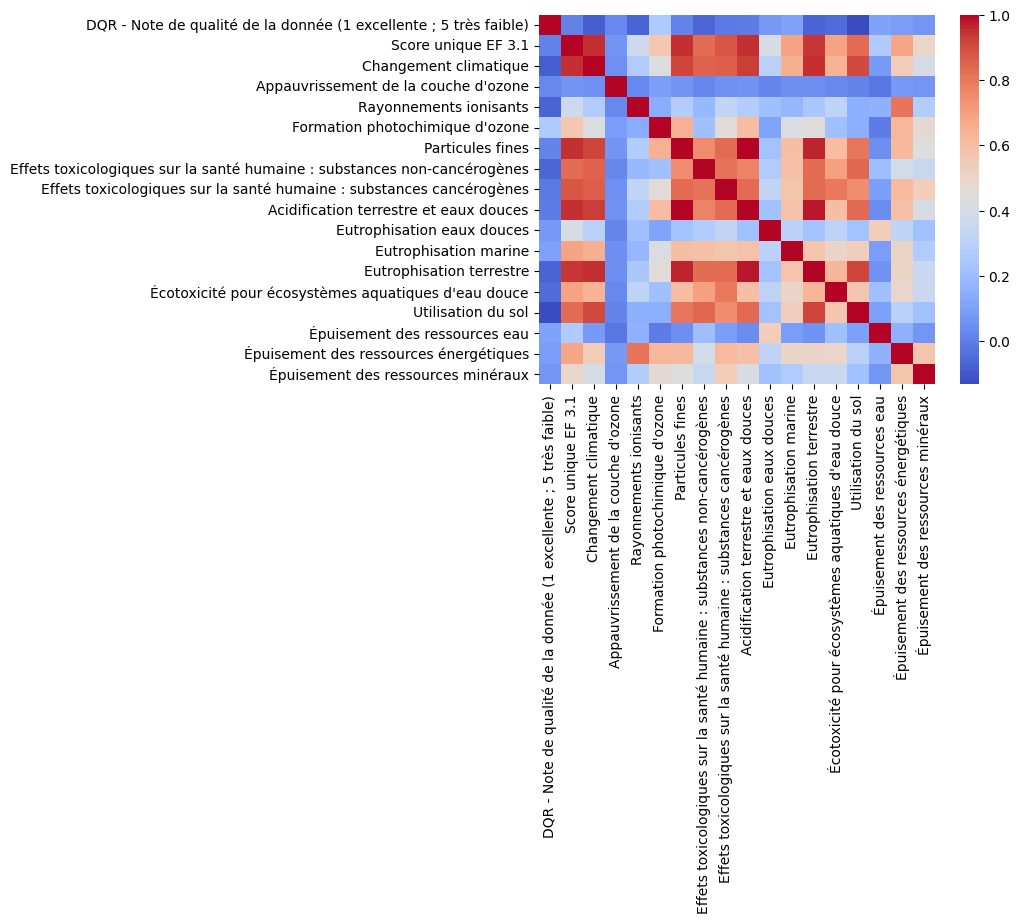

In [41]:
sns.heatmap(dfsynthese[dfsynthese.columns[11:]].corr(), cmap="coolwarm")

## Comparaison enchiladas / fondue savoyarde

### Enchiladas

In [ ]:
poulet = int(dfdetail[dfdetail["Nom du Produit en Français"].str.contains("Poulet, filet, sans peau, cru")]["Total"])*0.178

C:\Users\cefim\AppData\Local\Temp\ipykernel_31776\2324446304.py:1: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead



In [ ]:
sauce = int(dfdetail[dfdetail["Nom du Produit en Français"].str.contains("Sauce tomate aux oignons, préemballée")]["Total"])*0.35

C:\Users\cefim\AppData\Local\Temp\ipykernel_31776\4029933140.py:1: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead



In [ ]:
cheddar = int(dfdetail[dfdetail["Nom du Produit en Français"].str.contains("Cheddar")]["Total"])*0.4

C:\Users\cefim\AppData\Local\Temp\ipykernel_31776\1639935297.py:1: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead



In [ ]:
mais = int(dfdetail[dfdetail["Nom du Produit en Français"].str.contains("Maïs doux, appertisé, égoutté")]["Total"])*0.12

C:\Users\cefim\AppData\Local\Temp\ipykernel_31776\185817436.py:1: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead



In [ ]:
haricot = int(dfdetail[dfdetail["Nom du Produit en Français"].str.contains("Haricot rouge, appertisé, égoutté")]["Total"])*0.12

C:\Users\cefim\AppData\Local\Temp\ipykernel_31776\1372764531.py:1: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead



In [ ]:
poivron = int(dfdetail[dfdetail["Nom du Produit en Français"].str.contains("Poivron, vert, jaune ou rouge, cru")]["Total"])*0.1

C:\Users\cefim\AppData\Local\Temp\ipykernel_31776\4242273454.py:1: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead



In [ ]:
tortilla = 1.201018*0.2


In [ ]:
poulet + sauce + cheddar + mais + haricot + poivron + tortilla

4.048203600000001

## Fondue savoyarde

In [ ]:
comté = int(dfdetail[dfdetail["Nom du Produit en Français"].str.contains("Comté")]["Total"])*0.25

C:\Users\cefim\AppData\Local\Temp\ipykernel_31776\702732125.py:1: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead



In [ ]:
beaufort = int(dfdetail[dfdetail["Nom du Produit en Français"].str.contains("Beaufort")]["Total"])*0.25

C:\Users\cefim\AppData\Local\Temp\ipykernel_31776\1013270102.py:1: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead



In [ ]:
emmental = int(dfdetail[dfdetail["Nom du Produit en Français"]=="Emmental ou emmenthal"]["Total"])*0.3

C:\Users\cefim\AppData\Local\Temp\ipykernel_31776\2187314585.py:1: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead



In [ ]:
abondance = int(dfdetail[dfdetail["Nom du Produit en Français"].str.contains("Abondance")]["Total"])*0.2

C:\Users\cefim\AppData\Local\Temp\ipykernel_31776\554226356.py:1: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead



In [ ]:
vin_blanc = int(dfdetail[dfdetail["Nom du Produit en Français"].str.contains("Vin blanc sec")]["Total"])*0.1

C:\Users\cefim\AppData\Local\Temp\ipykernel_31776\1895220938.py:1: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead



In [ ]:
ail = int(dfdetail[dfdetail["Nom du Produit en Français"].str.contains("Ail, cru")]["Total"])*0.05

C:\Users\cefim\AppData\Local\Temp\ipykernel_31776\3476531841.py:1: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead



In [ ]:
comté + beaufort + emmental + abondance + vin_blanc + ail

6.1